Dataset loader

In [148]:
import pandas as pd
import numpy as np

# Specify the path to your CSV file
file_path = 'laptop_specs_11_2024.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path, encoding='latin1')

print(data.head())

   laptop_specs_id laptop_specs_source laptop_specs_brand  \
0                1             phongvu               acer   
1                2             phongvu               asus   
2                3             phongvu               asus   
3                4             phongvu               acer   
4                5             phongvu               acer   

            cpu_specs_laptop_specs_laptop_specs_name         laptop_specs_cpu  \
0  laptop acer swift 14 ai oled sf14-51-53p9 (ult...  intel core ultra 5 226v   
1  laptop asus zenbook s 14 ux5406sa-pv140ws (ult...  intel core ultra 7 258v   
2  laptop asus vivobook 15x oled m3504ya-l1268w (...        amd ryzen 5 7530u   
3  laptop acer predator helios neo 14 phn14-51-96...  intel core ultra 9 185h   
4  laptop acer gaming aspire 7 a715-76g-5806 (i5-...     intel core i5 12450h   

   laptop_specs_vga  laptop_specs_ram_amount laptop_specs_ram_type  \
0               NaN                     16.0                  ddr5   
1     

Checking up the statistics

In [149]:
def column_statistics(df, column_name):
    return df[column_name].describe()

stats = column_statistics(data, 'laptop_specs_price')
print(stats)


count    2.702000e+03
mean     2.942449e+07
std      1.869344e+07
min      3.590000e+06
25%      1.799000e+07
50%      2.399000e+07
75%      3.464000e+07
max      1.824900e+08
Name: laptop_specs_price, dtype: float64


In [150]:
def count_na_per_column(df):
    return df.isna().sum()

na_counts = count_na_per_column(data)
print(na_counts)

laptop_specs_id                                0
laptop_specs_source                            0
laptop_specs_brand                             3
cpu_specs_laptop_specs_laptop_specs_name       0
laptop_specs_cpu                               0
                                            ... 
gpu_specs_test_directx_9                    1645
gpu_specs_test_directx_10                   1645
gpu_specs_test_directx_11                   1645
gpu_specs_test_directx_12                   1645
gpu_specs_test_gpu_compute                  1645
Length: 70, dtype: int64


In [151]:
df0 = data

Treating other things

In [152]:
import pandas as pd
import re

def classify_laptops_dynamic(df, column_name):
    """
    Classify laptops in a DataFrame as 'prestige' or 'normal' based on their names.

    :param df: pandas DataFrame containing laptop data
    :param column_name: str, the name of the column with laptop names
    :return: pandas DataFrame with an added 'category' column for classification
    """
    # Define a list of keywords indicating a "prestige" laptop
    prestige_keywords = [
        "gaming", "pro", "advanced", "predator", "rog", "stealth", 
        "victus", "zenbook", "xps", "zephyrus", "surface", "carbon", "ultra"
    ]

    # Compile the keywords into a regex pattern
    prestige_pattern = re.compile(r'\b(' + '|'.join(prestige_keywords) + r')\b', re.IGNORECASE)

    def classify(name):
        # Normalize name to lowercase and apply checks
        name = name.lower()

        # 1. Check if the name contains any prestige keywords
        if prestige_pattern.search(name):
            return "1"
        
        # 2. Check if the name has more than 5 words (brand + series + 2+ descriptive terms)
        words = name.split()
        if len(words) > 5:
            return "1"

        # Default: "normal"
        return "0"
    
    # Apply the classification function to the specified column
    df["category"] = df[column_name].apply(classify)
    return df

# Example usage:
# Assuming `laptops.csv` contains the data with a column "LaptopName"
df1 = classify_laptops_dynamic(df0, "cpu_specs_laptop_specs_laptop_specs_name")

# Print the updated DataFrame
print(df1)




      laptop_specs_id laptop_specs_source laptop_specs_brand  \
0                   1             phongvu               acer   
1                   2             phongvu               asus   
2                   3             phongvu               asus   
3                   4             phongvu               acer   
4                   5             phongvu               acer   
...               ...                 ...                ...   
2697             2698            laptopaz             lenovo   
2698             2699            laptopaz               dell   
2699             2700            laptopaz                 hp   
2700             2701            laptopaz             lenovo   
2701             2702            laptopaz             lenovo   

               cpu_specs_laptop_specs_laptop_specs_name  \
0     laptop acer swift 14 ai oled sf14-51-53p9 (ult...   
1     laptop asus zenbook s 14 ux5406sa-pv140ws (ult...   
2     laptop asus vivobook 15x oled m3504ya-l1268w (..

In [153]:
df2 = df1.drop(columns=["laptop_specs_id", "laptop_specs_source", "laptop_specs_cpu", "laptop_specs_vga", \
                "cpu_specs_laptop_specs_laptop_specs_name", "cpu_specs_performance_clockspeed", "cpu_specs_performance_turbospeed", \
                "cpu_specs_performance_cores", "cpu_specs_performance_threads", "cpu_specs_efficient_clockspeed", \
                "cpu_specs_efficient_turbospeed", "cpu_specs_efficient_cores", "cpu_specs_efficient_threads", "cpu_specs_tdp", \
                "cpu_specs_l1_instruction_cache", "cpu_specs_l1_data_cache", "cpu_specs_l2_cache", "cpu_specs_l3_cache", \
                "cpu_specs_eff_l1_instruction_cache", "cpu_specs_eff_l1_data_cache", "cpu_specs_eff_l2_cache", \
                "gpu_specs_bus_interface", "gpu_specs_max_memory_size", 'gpu_specs_core_clock', 'gpu_specs_max_direct', \
                'gpu_specs_open_gl', 'gpu_specs_max_tdp', 'cpu_specs_laptop_specs_laptop_specs_name'])

df2

,laptop_specs_brand,laptop_specs_ram_amount,laptop_specs_ram_type,laptop_specs_storage_amount,laptop_specs_storage_type,laptop_specs_webcam_resolution,laptop_specs_screen_size,laptop_specs_screen_resolution,laptop_specs_screen_refresh_rate,laptop_specs_screen_brightness,...,cpu_specs_extended_instructions,cpu_specs_single_thread,cpu_specs_laptop_specs_laptop_specs_name.2,gpu_specs_avg_g3d_mark,gpu_specs_test_directx_9,gpu_specs_test_directx_10,gpu_specs_test_directx_11,gpu_specs_test_directx_12,gpu_specs_test_gpu_compute,category
0,acer,16.0,ddr5,1024.0,ssd,yes,14.0,2880x1800,90.0,400.0,...,15973,3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,asus,32.0,ddr5,1024.0,ssd,yes,14.0,2880x1800,120.0,500.0,...,15602,3992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,asus,16.0,ddr4,512.0,ssd,yes,15.6,1920x1080,NaN,600.0,...,12599,3112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,acer,32.0,ddr5,1024.0,ssd,yes,14.5,3072x1920,165.0,400.0,...,20244,3702,geforce rtx 4070,19567.0,222.0,118.0,178.0,85.0,8362.0,1
4,acer,8.0,ddr4,512.0,ssd,yes,15.6,1920x1080,144.0,NaN,...,12638,3379,geforce rtx 3050,9458.0,118.0,55.0,73.0,45.0,3865.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,lenovo,16.0,ddr5,512.0,ssd,yes,16.0,2560x1600,165.0,500.0,...,26361,3993,geforce rtx 4060,17662.0,218.0,110.0,159.0,73.0,6828.0,1
2698,dell,8.0,ddr5,512.0,ssd,yes,14.0,1920x1200,NaN,250.0,...,16639,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2699,hp,16.0,ddr5,1024.0,ssd,yes,14.0,1920x1200,NaN,300.0,...,20005,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2700,lenovo,12.0,ddr5,512.0,ssd,yes,15.6,1920x1080,144.0,300.0,...,13985,3397,geforce rtx 2050,7671.0,105.0,39.0,48.0,41.0,3467.0,1


In [154]:
df3 = df2
def categorize(listed):
    for i in listed:
        df3[i] = pd.Categorical(df3[i]).codes
categorize(["laptop_specs_brand", "laptop_specs_ram_type", 'laptop_specs_storage_type', \
            'laptop_specs_webcam_resolution', 'laptop_specs_default_os'])

df3

,laptop_specs_brand,laptop_specs_ram_amount,laptop_specs_ram_type,laptop_specs_storage_amount,laptop_specs_storage_type,laptop_specs_webcam_resolution,laptop_specs_screen_size,laptop_specs_screen_resolution,laptop_specs_screen_refresh_rate,laptop_specs_screen_brightness,...,cpu_specs_extended_instructions,cpu_specs_single_thread,cpu_specs_laptop_specs_laptop_specs_name.2,gpu_specs_avg_g3d_mark,gpu_specs_test_directx_9,gpu_specs_test_directx_10,gpu_specs_test_directx_11,gpu_specs_test_directx_12,gpu_specs_test_gpu_compute,category
0,0,16.0,1,1024.0,2,1,14.0,2880x1800,90.0,400.0,...,15973,3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,32.0,1,1024.0,2,1,14.0,2880x1800,120.0,500.0,...,15602,3992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,16.0,0,512.0,2,1,15.6,1920x1080,NaN,600.0,...,12599,3112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0,32.0,1,1024.0,2,1,14.5,3072x1920,165.0,400.0,...,20244,3702,geforce rtx 4070,19567.0,222.0,118.0,178.0,85.0,8362.0,1
4,0,8.0,0,512.0,2,1,15.6,1920x1080,144.0,NaN,...,12638,3379,geforce rtx 3050,9458.0,118.0,55.0,73.0,45.0,3865.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,8,16.0,1,512.0,2,1,16.0,2560x1600,165.0,500.0,...,26361,3993,geforce rtx 4060,17662.0,218.0,110.0,159.0,73.0,6828.0,1
2698,3,8.0,1,512.0,2,1,14.0,1920x1200,NaN,250.0,...,16639,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2699,5,16.0,1,1024.0,2,1,14.0,1920x1200,NaN,300.0,...,20005,3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2700,8,12.0,1,512.0,2,1,15.6,1920x1080,144.0,300.0,...,13985,3397,geforce rtx 2050,7671.0,105.0,39.0,48.0,41.0,3467.0,1


In [155]:
df4 = df3

def fill_list(name, filler):
    # List of elements to randomly choose from
    fill_values = filler

    # Fill NaN values with random elements from the list
    df4[name] = df4[name].apply(
        lambda x: x if pd.notna(x) else np.random.choice(fill_values)
    )

def fill_rand(name, start, end):
    min_value = start
    max_value = end

    # Fill NaN values with random numbers within the range
    df4[name] = df4[name].apply(
        lambda x: x if pd.notna(x) else np.random.randint(min_value, max_value + 1) + np.random.randint(0, 100)/100
    )

fill_list("laptop_specs_ram_amount", [8, 16, 32])
fill_list("laptop_specs_storage_amount", [256, 512, 1024])
fill_list("laptop_specs_screen_refresh_rate", [60, 90, 120, 144, 180])
fill_list("laptop_specs_screen_brightness", [250, 300, 350, 400, 500])
fill_list("laptop_specs_battery_capacity", [35, 40, 45, 48, 50, 55, 60])
fill_list("laptop_specs_battery_cells", [3, 4])
fill_list("laptop_specs_weight", [1.5, 1.8])
fill_list("laptop_specs_warranty", [12, 24])
fill_list("laptop_specs_number_usb_a_ports", [0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3])
fill_list("laptop_specs_number_usb_c_ports", [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3])
fill_list("laptop_specs_number_hdmi_ports", [0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
fill_list("laptop_specs_number_ethernet_ports", [0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
fill_list("laptop_specs_number_audio_jacks", [0, 1])
fill_list("gpu_specs_avg_g3d_mark", [0])
fill_list("gpu_specs_test_directx_9", [0])
fill_list("gpu_specs_test_directx_10", [0])
fill_list("gpu_specs_test_directx_11", [0])
fill_list("gpu_specs_test_directx_12", [0])
fill_list("gpu_specs_test_gpu_compute", [0])
fill_list("laptop_specs_screen_resolution", ["1920x1080"])

fill_rand("laptop_specs_width", 31, 39) 
fill_rand("laptop_specs_depth", 21, 27)
fill_rand("laptop_specs_height", 21, 27)
fill_rand("laptop_specs_screen_size", 12, 16)

df4


,laptop_specs_brand,laptop_specs_ram_amount,laptop_specs_ram_type,laptop_specs_storage_amount,laptop_specs_storage_type,laptop_specs_webcam_resolution,laptop_specs_screen_size,laptop_specs_screen_resolution,laptop_specs_screen_refresh_rate,laptop_specs_screen_brightness,...,cpu_specs_extended_instructions,cpu_specs_single_thread,cpu_specs_laptop_specs_laptop_specs_name.2,gpu_specs_avg_g3d_mark,gpu_specs_test_directx_9,gpu_specs_test_directx_10,gpu_specs_test_directx_11,gpu_specs_test_directx_12,gpu_specs_test_gpu_compute,category
0,0,16.0,1,1024.0,2,1,14.0,2880x1800,90.0,400.0,...,15973,3965,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,32.0,1,1024.0,2,1,14.0,2880x1800,120.0,500.0,...,15602,3992,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,16.0,0,512.0,2,1,15.6,1920x1080,90.0,600.0,...,12599,3112,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,32.0,1,1024.0,2,1,14.5,3072x1920,165.0,400.0,...,20244,3702,geforce rtx 4070,19567.0,222.0,118.0,178.0,85.0,8362.0,1
4,0,8.0,0,512.0,2,1,15.6,1920x1080,144.0,350.0,...,12638,3379,geforce rtx 3050,9458.0,118.0,55.0,73.0,45.0,3865.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,8,16.0,1,512.0,2,1,16.0,2560x1600,165.0,500.0,...,26361,3993,geforce rtx 4060,17662.0,218.0,110.0,159.0,73.0,6828.0,1
2698,3,8.0,1,512.0,2,1,14.0,1920x1200,60.0,250.0,...,16639,3675,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2699,5,16.0,1,1024.0,2,1,14.0,1920x1200,60.0,300.0,...,20005,3657,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2700,8,12.0,1,512.0,2,1,15.6,1920x1080,144.0,300.0,...,13985,3397,geforce rtx 2050,7671.0,105.0,39.0,48.0,41.0,3467.0,1


In [156]:
df5 = df4
# Split the 'Dimensions' column into M and N
df5[['M', 'N']] = df5['laptop_specs_screen_resolution'].str.split('x', expand=True).astype(int)

# Calculate M * N and M / N
df5['screen_area'] = df5['M'] * df5['N']
df5['screen_ratio'] = df5['M'] / df5['N']

df5 = df5.drop(columns=["M", 'N', 'laptop_specs_screen_resolution', 'cpu_specs_laptop_specs_laptop_specs_name.2', \
                        'cpu_specs_laptop_specs_laptop_specs_name.1'])

In [157]:
na_counts = count_na_per_column(df5)
na_counts

laptop_specs_brand                    0
laptop_specs_ram_amount               0
laptop_specs_ram_type                 0
laptop_specs_storage_amount           0
laptop_specs_storage_type             0
laptop_specs_webcam_resolution        0
laptop_specs_screen_size              0
laptop_specs_screen_refresh_rate      0
laptop_specs_screen_brightness        0
laptop_specs_battery_capacity         0
laptop_specs_battery_cells            0
laptop_specs_weight                   0
laptop_specs_default_os               0
laptop_specs_warranty                 0
laptop_specs_price                    0
laptop_specs_width                    0
laptop_specs_depth                    0
laptop_specs_height                   0
laptop_specs_number_usb_a_ports       0
laptop_specs_number_usb_c_ports       0
laptop_specs_number_hdmi_ports        0
laptop_specs_number_ethernet_ports    0
laptop_specs_number_audio_jacks       0
cpu_specs_multithread_rating          0
cpu_specs_single_thread_rating        0


In [158]:
output_path = 'laptop_specs_processed.csv'  # Specify your file name or path
df5.to_csv(output_path, index=False) 

proc = df5

Doing some EDAs

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

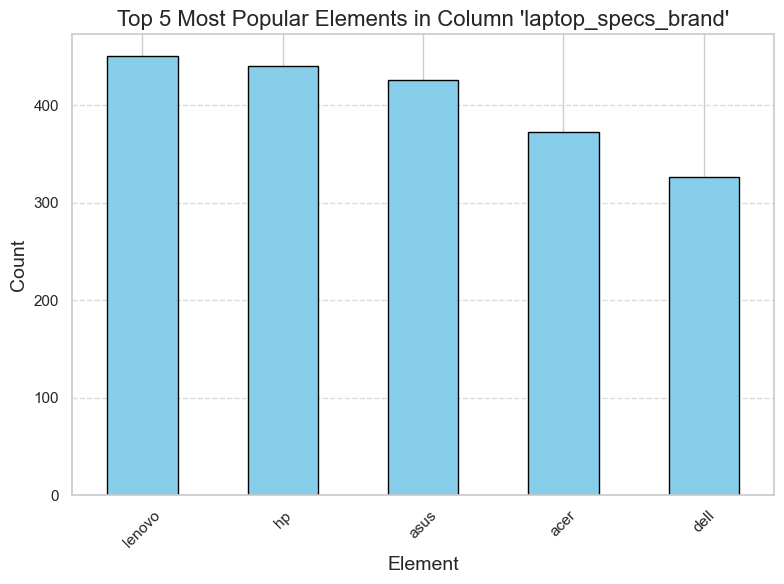

In [160]:
def get_top(df, cat_name, top_cnt = 5):
    top = df[cat_name].value_counts().head(top_cnt)

    plt.figure(figsize=(8, 6))
    top.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 5 Most Popular Elements in Column '{cat_name}'", fontsize=16)
    plt.xlabel("Element", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

get_top(data, "laptop_specs_brand", 5)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


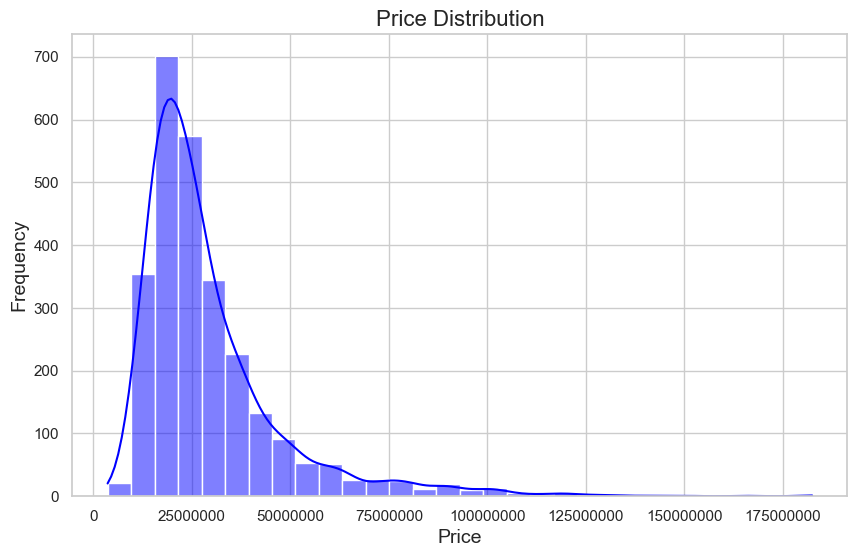

In [161]:
from matplotlib.ticker import ScalarFormatter

def plot_hist(df, name):
    # Set the plot style
    sns.set_theme(style="whitegrid")
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df[name], kde=True, color="blue", bins=30)

    # Add labels and title
    plt.title("Price Distribution", fontsize=16)
    plt.xlabel("Price", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

    # Disable scientific notation on the x-axis
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style="plain", axis="x")

    # Show the plot
    plt.show()

plot_hist(data, "laptop_specs_price")

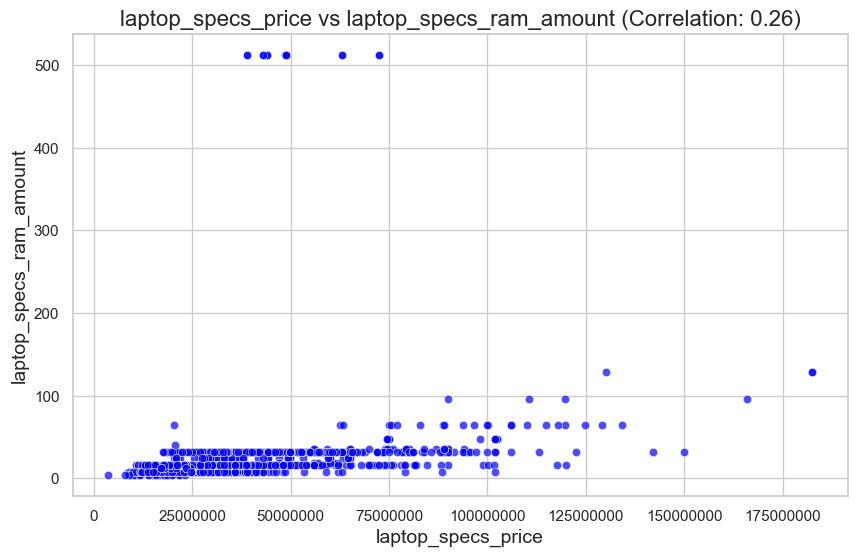

The correlation between laptop_specs_price and laptop_specs_ram_amount is: 0.26


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_duo_correlation(data, first_col, second_col):
    import numpy as np

    # Calculate correlation
    correlation = data[first_col].corr(data[second_col])
    
    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=first_col, y=second_col, color="blue", alpha=0.7)

    # Add titles and labels
    plt.title("{} vs {} (Correlation: {:.2f})".format(first_col, second_col, correlation), fontsize=16)
    plt.xlabel("{}".format(first_col), fontsize=14)
    plt.ylabel("{}".format(second_col), fontsize=14)
    plt.grid(True)

    # Adjust x-axis formatter
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style="plain", axis="x")
    
    # Show plot
    plt.show()
    
    # Print correlation
    print(f"The correlation between {first_col} and {second_col} is: {correlation:.2f}")

plot_duo_correlation(df5, 'laptop_specs_price', 'laptop_specs_ram_amount')



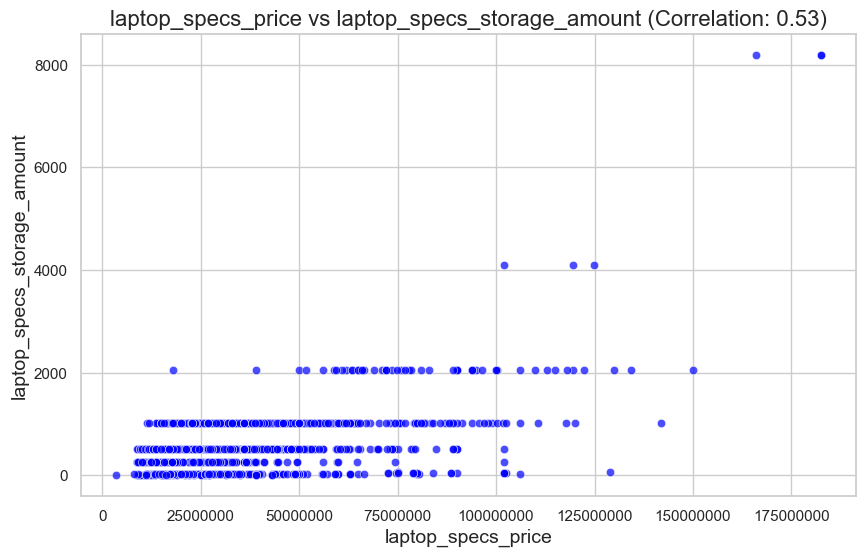

The correlation between laptop_specs_price and laptop_specs_storage_amount is: 0.53


In [163]:
plot_duo_correlation(df5, 'laptop_specs_price', 'laptop_specs_storage_amount')

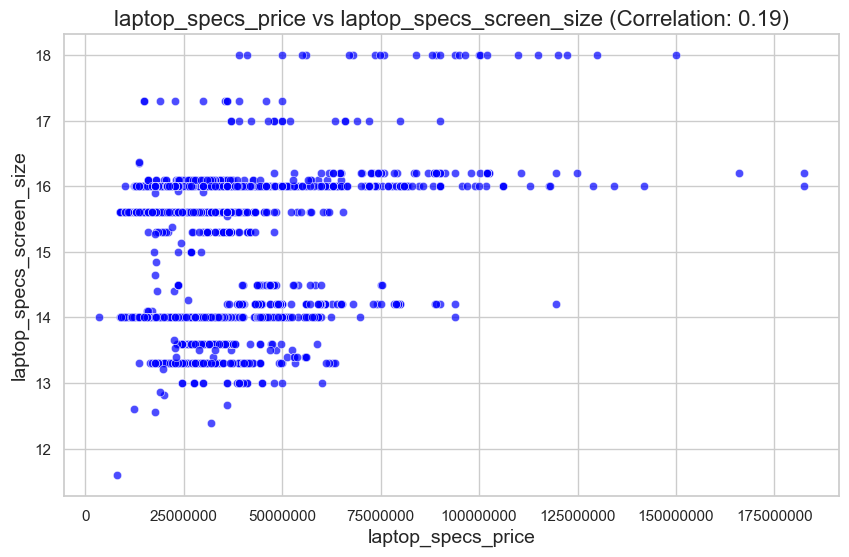

The correlation between laptop_specs_price and laptop_specs_screen_size is: 0.19


In [164]:
plot_duo_correlation(df5, 'laptop_specs_price', 'laptop_specs_screen_size')

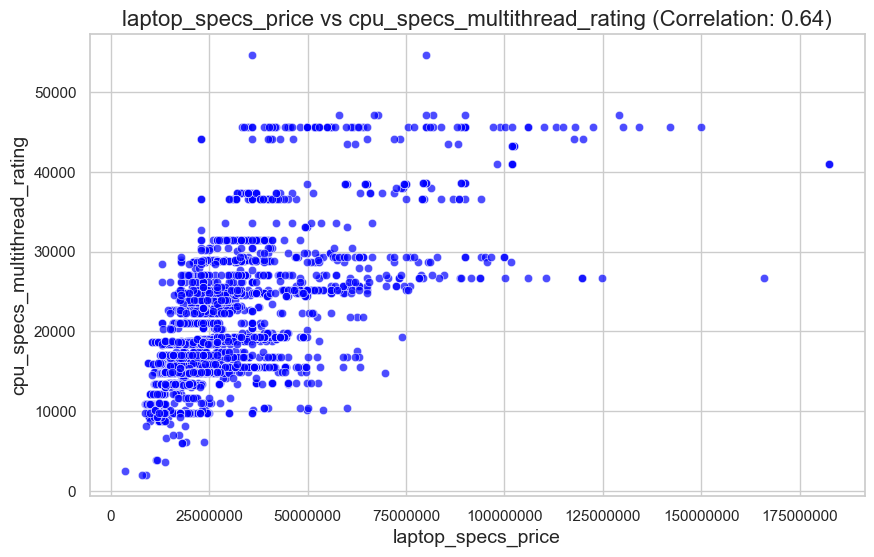

The correlation between laptop_specs_price and cpu_specs_multithread_rating is: 0.64


In [165]:
plot_duo_correlation(df5, 'laptop_specs_price', 'cpu_specs_multithread_rating')

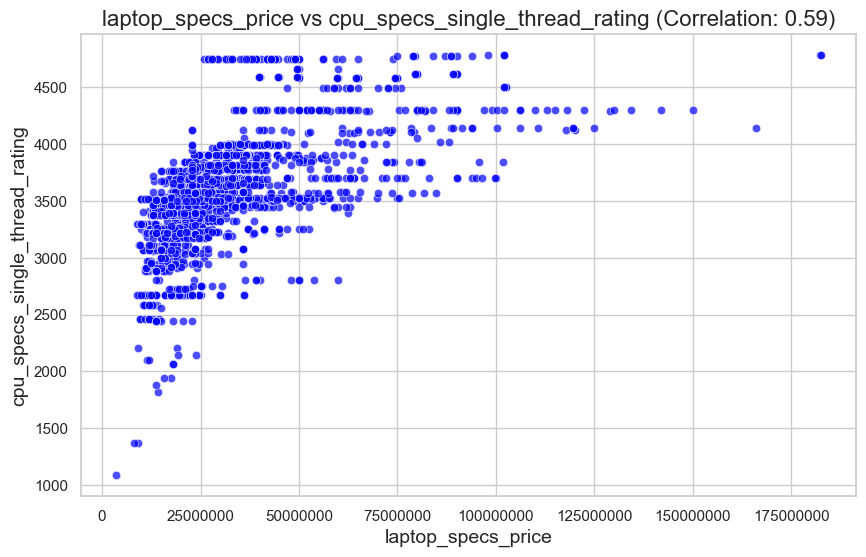

The correlation between laptop_specs_price and cpu_specs_single_thread_rating is: 0.59


In [166]:
plot_duo_correlation(df5, 'laptop_specs_price', 'cpu_specs_single_thread_rating')

In [168]:
def calculate_price_correlation(df, price_column):
    # Ensure the column exists
    if price_column not in df.columns:
        raise ValueError(f"Column '{price_column}' not found in the DataFrame.")
    
    # Compute correlations
    correlations = df.corr()[price_column].drop(price_column)
    
    # Print each correlation
    print(f"Correlations with '{price_column}':\n")
    print(correlations.sort_values(ascending=False))
    
    return correlations

# Example usage
price_correlations = calculate_price_correlation(df5, 'laptop_specs_price')


Correlations with 'laptop_specs_price':

cpu_specs_physics                     0.753238
cpu_specs_find_prime_numbers          0.711191
cpu_specs_random_string_sorting       0.680880
cpu_specs_floating_point_math         0.674209
cpu_specs_multithread_rating          0.644385
screen_area                           0.642152
cpu_specs_data_compression            0.637363
cpu_specs_single_thread               0.588298
cpu_specs_single_thread_rating        0.588298
laptop_specs_battery_capacity         0.582701
cpu_specs_data_encryption             0.577388
laptop_specs_storage_amount           0.526453
cpu_specs_extended_instructions       0.502548
cpu_specs_integer_math                0.482887
gpu_specs_test_directx_11             0.387688
gpu_specs_test_directx_10             0.378461
gpu_specs_test_gpu_compute            0.375154
gpu_specs_avg_g3d_mark                0.359413
gpu_specs_test_directx_9              0.335832
gpu_specs_test_directx_12             0.331015
laptop_specs_batter

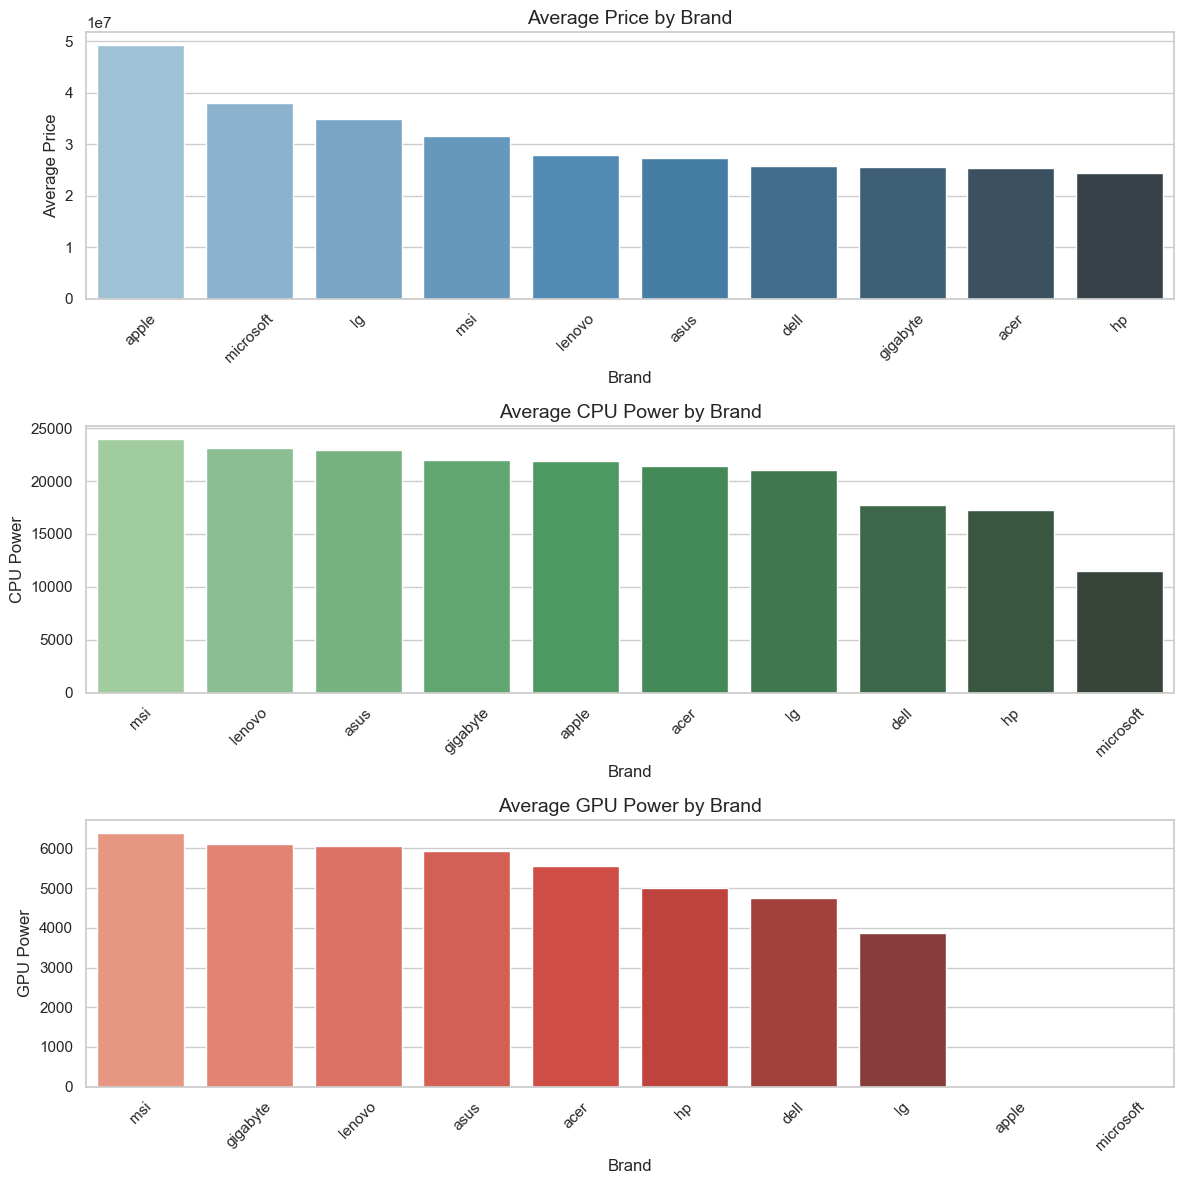

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

brand_counts = data["laptop_specs_brand"].value_counts()
valid_brands = brand_counts[brand_counts >= 10].index
filtered_df = data[data["laptop_specs_brand"].isin(valid_brands)]

# Group data by brand for average price and GPU power
avg_price = filtered_df.groupby("laptop_specs_brand")["laptop_specs_price"].mean().sort_values(ascending=False)
avg_cpu = filtered_df.groupby("laptop_specs_brand")["cpu_specs_multithread_rating"].mean().sort_values(ascending=False)
avg_gpu = filtered_df.groupby("laptop_specs_brand")["gpu_specs_test_gpu_compute"].mean().sort_values(ascending=False)

# Plot Average Price and GPU Power
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
sns.barplot(x=avg_price.index, y=avg_price.values, ax=axes[0], palette="Blues_d")
axes[0].set_title("Average Price by Brand", fontsize=14)
axes[0].set_ylabel("Average Price")
axes[0].set_xlabel("Brand")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(x=avg_cpu.index, y=avg_cpu.values, ax=axes[1], palette="Greens_d")
axes[1].set_title("Average CPU Power by Brand", fontsize=14)
axes[1].set_ylabel("CPU Power")
axes[1].set_xlabel("Brand")
axes[1].tick_params(axis="x", rotation=45)

sns.barplot(x=avg_gpu.index, y=avg_gpu.values, ax=axes[2], palette="Reds_d")
axes[2].set_title("Average GPU Power by Brand", fontsize=14)
axes[2].set_ylabel("GPU Power")
axes[2].set_xlabel("Brand")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
